*Task 1*

In [21]:
import pandas as pd
import matplotlib as plt
from numpy import percentile

In [22]:
yearly= pd.read_csv("datasets/yearly_deaths_by_clinic.csv")

In [23]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


*Task 2*

In [24]:
yearly["proportion_deaths"]=(yearly["deaths"]/yearly["births"])

In [25]:
yearly1=yearly.loc[yearly['clinic']=="clinic 1"]
yearly2=yearly.loc[yearly['clinic']=="clinic 2"]
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


*Task 3*

Text(0.5, 0, 'Year')

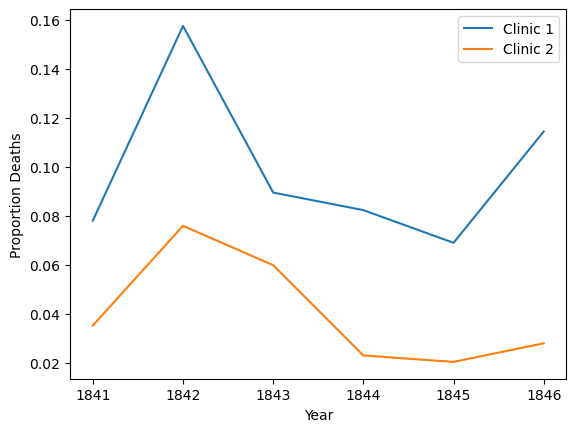

In [26]:
ax = yearly1.plot(x="year", y="proportion_deaths",label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2",ax=ax )
ax.set_ylabel("Proportion Deaths")
ax.set_xlabel("Year")

*Task 4*

In [27]:
monthly= pd.read_csv("datasets/monthly_deaths.csv",parse_dates=["date"])
monthly["proportion_deaths"]=(monthly["deaths"]/monthly["births"])
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


*Task 5*

Text(0, 0.5, 'Proportion Deaths')

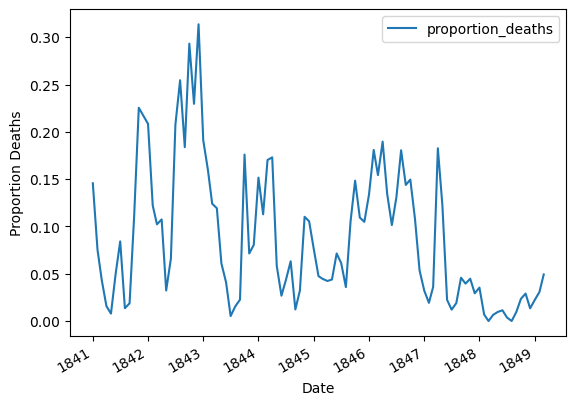

In [28]:
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_xlabel("Date")
ax.set_ylabel("Proportion Deaths")

*Task 6*

In [29]:
handwashing_start='1847-06-01'
before_washing= monthly[monthly["date"] < handwashing_start]
after_washing= monthly[monthly["date"] > handwashing_start]

Text(0.5, 0, 'Date')

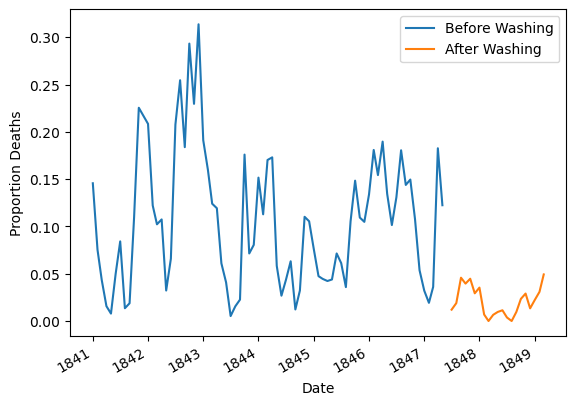

In [30]:
ax = before_washing.plot(x="date", y="proportion_deaths",label="Before Washing")
after_washing.plot(x="date", y="proportion_deaths", label="After Washing",ax=ax )
ax.set_ylabel("Proportion Deaths")
ax.set_xlabel("Date")

*Task 7*

In [31]:
before_proportion=before_washing.loc[:,'proportion_deaths']
after_proportion=after_washing.loc[:,'proportion_deaths']
mean_diff=  after_proportion.mean()-before_proportion.mean() 
mean_diff

-0.08401825915965422

*Task 8*

In [35]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)


0.025   -0.100959
0.975   -0.067186
dtype: float64


*Task 9*

Handwashing reduced the proportion of deaths by between 6.7% and 10 %,in a 95% confidence interval.
The statement is True. Doctors should wash their hands.